# MNIST Fashion Dataset

## Import Modules and Declare Google Drive Paths

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import keras
model1_weights = 'drive/My Drive/Colab Notebooks/Fashion MNIST/model1.weights'
model2_weights = 'drive/My Drive/Colab Notebooks/Fashion MNIST/model2.weights'

Using TensorFlow backend.


## Prepare Dataset and Declare Models

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

train_x, test_x = train_x/255, test_x/255
print(train_x.shape)
train_x, test_x = train_x.reshape(60000, 28, 28, 1), test_x.reshape(10000, 28, 28, 1)
train_y, test_y = keras.utils.to_categorical(train_y, 10, 'float32'), keras.utils.to_categorical(test_y, 10, 'float32')

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)


In [0]:
model1 = keras.Sequential([
                          keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = 3, strides = 1, activation = 'relu', filters = 64, padding = 'same'),
                          keras.layers.MaxPool2D(2, 1, padding = 'same'),
                          keras.layers.Conv2D(kernel_size = 3, strides = 1, activation = 'relu', filters = 128, padding = 'same'),
                          keras.layers.MaxPool2D(2, 1, padding = 'same'),
                          keras.layers.Flatten(),
                          keras.layers.Dropout(0.1),
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(64, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')

])
model2 = keras.Sequential([keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = 3, strides = 1, activation = 'relu', filters = 64, padding = 'same'), 
                           keras.layers.MaxPool2D(2, 1, padding = 'same'), 
                           keras.layers.Conv2D(kernel_size = 3, strides = 1, activation = 'relu', filters = 128, padding = 'same'), 
                           keras.layers.MaxPool2D(2, 1, padding = 'same'), 
                           keras.layers.Flatten(), 
                           keras.layers.Dropout(0.1), 
                           keras.layers.Dense(128, activation = 'relu'), 
                           keras.layers.Dense(64, activation = 'tanh'), 
                           keras.layers.Dense(10, activation = 'softmax')])
model1.compile(keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.compile(keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Choose Model(s) to Train

In [0]:
model_to_train = 0
while model_to_train != 1 and model_to_train != 2 and model_to_train != -1:
  try:
    model_to_train = int(input('Which model would you like to train? '))
  except KeyboardInterrupt:
    print('Exiting...')
    model_to_train = -1
  except:
    print('Please enter either 1 or 2.')
if model_to_train == 1:
  history = model1.fit(x = train_x, y = train_y, batch_size = 1000, epochs = 1, validation_data = (test_x, test_y))
  model1.save_weights(model1_weights)
elif model_to_train == -1:
  print('Exited.')
else:
  history = model2.fit(x = train_x, y = train_y, batch_size = 1000, epochs = 1, validation_data = (test_x, test_y))
  model2.save_weights(model2_weights)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 720s 12ms/step - loss: 0.2190 - accuracy: 0.9198 - val_loss: 0.2687 - val_accuracy: 0.9016


## Choose Model(s) to Load

In [0]:
model_to_load = 0
while model_to_load != 1 and model_to_load != 2 and model_to_load != -1:
  try:
    model_to_load = int(input('Which model would you like to load? '))
  except KeyboardInterrupt:
    print('Exiting...')
    model_to_load = -1
  except:
    print('Please type either 1 or 2.')
if model_to_load == 1:
  model1.load_weights(model1_weights)
elif model_to_load == -1:
  print('Exited.')
else:
  model2.load_weights(model2_weights)

Which model would you like to load? 2


## Function to Plot and Predict Images

Prediction: Dress
Confidence: 99.0398645401001 percent
Real: Dress


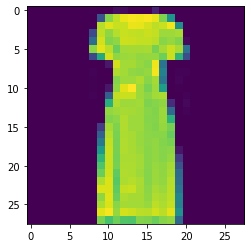

In [0]:
def plot_predict(train_or_test:str, photo_num:int, model:int, show:bool = True, print_info:bool = True):
  if train_or_test == 'train':
    image = train_x[photo_num]
    real = int(np.argmax(train_y[photo_num]))
  elif train_or_test == 'test':
    image = test_x[photo_num]
    real = int(np.argmax(test_y[photo_num]))

  if model == 1:
    prediction = model1.predict(image.reshape(1, 28, 28, 1))
  elif model == 2:
    prediction = model2.predict(image.reshape(1, 28, 28, 1))

  prediction_item = int(np.argmax(prediction))
  confidence = str(float(prediction[0][prediction_item])*100) + ' percent'
  def num_to_item(item_num):
    if item_num == 0:
      return 'T-Shirt/Top'
    elif item_num == 1:
      return 'Trouser'
    elif item_num == 2:
      return 'Pullover'
    elif item_num == 3:
      return 'Dress'
    elif item_num == 4:
      return 'Coat'
    elif item_num == 5:
      return 'Sandal'
    elif item_num == 6:
      return 'Shirt'
    elif item_num == 7:
      return 'Sneaker'
    elif item_num == 8:
      return 'Bag'
    elif item_num == 9:
      return 'Ankle Boot'
  prediction_item = num_to_item(prediction_item)
  real = num_to_item(real)
  if show:
    plot = plt.imshow(image[:, :, 0], vmax = 1)
  if print_info:
    print(f'Prediction: {prediction_item}\nConfidence: {confidence}\nReal: {real}')
  return [{'prediction_item': prediction_item, 'real': real, 'confidence': confidence}, image[:, :, 0]]

info = plot_predict('train', 50, 2)

## Function to Check Percent of Images Wrong in Dataset and Give More Details

99.99 percent done...
9.98 percent wrong.

Total Misclasses: 998


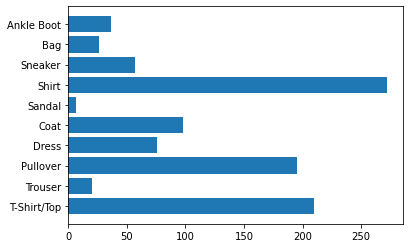


Total T-Shirt/Top Misclass Predictions


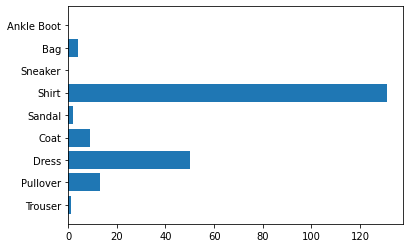


Total Trouser Misclass Predictions


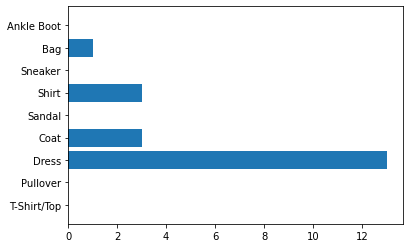


Total Pullover Misclass Predictions


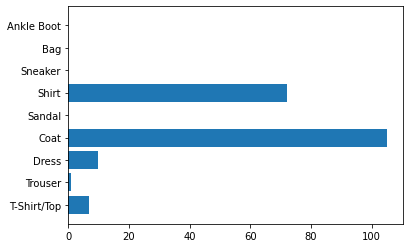


Total Dress Misclass Predictions


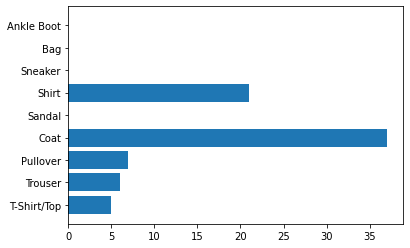


Total Coat Misclass Predictions


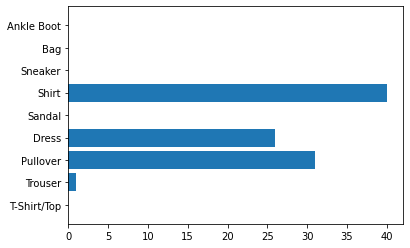


Total Sandal Misclass Predictions


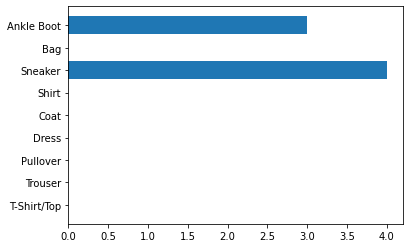


Total Shirt Misclass Predictions


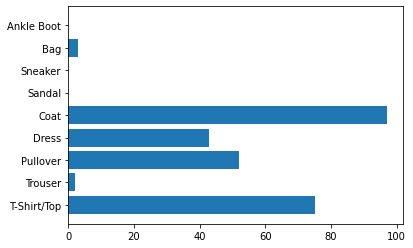


Total Sneaker Misclass Predictions


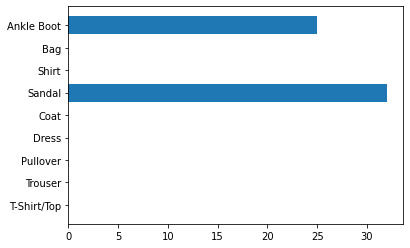


Total Bag Misclass Predictions


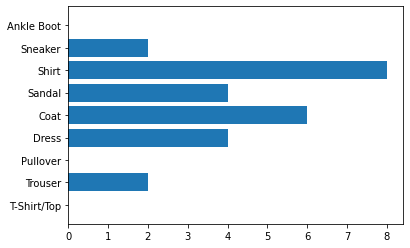


Total Ankle Boot Misclass Predictions


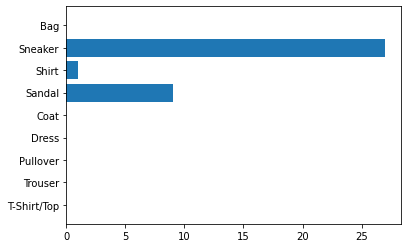

In [0]:
def check_wrong(train_or_test:str, model:int, show_wrong_items:bool = True):
  wrong_predictions = []

  if train_or_test == 'train':
    img_range = 60000.0
  else:
    img_range = 10000.0

  for image in range(int(img_range)):
    info = plot_predict(train_or_test, image, model, False, False)
    if info[0]['prediction_item'] != info[0]['real']:
      wrong_predictions.append([info[0]['real'], info[0]['prediction_item']])
    progress = str(image/img_range*100)
    print(f'\r{progress} percent done...', end = '')

  percent_wrong = str(int(len(wrong_predictions))/img_range*100)
  print(f'\n{percent_wrong} percent wrong.')

  if show_wrong_items:
    total_misclasses_spread = {'T-Shirt/Top': 0, 'Trouser': 0, 'Pullover': 0, 'Dress': 0, 'Coat': 0, 'Sandal': 0, 'Shirt': 0, 'Sneaker': 0, 'Bag': 0, 'Ankle Boot': 0}
    for item in wrong_predictions:
      real_item = item[0]
      total_misclasses_spread[real_item] +=1
  
    total_misclass_labels = np.asarray(list(total_misclasses_spread.keys()))
    total_misclass_values = np.asarray(list(total_misclasses_spread.values()))
    total_misclasses = str(len(wrong_predictions))
    print(f'\nTotal Misclasses: {total_misclasses}')
    total_misclass_bar_graph = plt.barh(total_misclass_labels, total_misclass_values)
    plt.show()

    print(f'\nTotal T-Shirt/Top Misclass Predictions')
    tshirt_top_misclass_spread = {'Trouser': 0, 'Pullover': 0, 'Dress': 0, 'Coat': 0, 'Sandal': 0, 'Shirt': 0, 'Sneaker': 0, 'Bag': 0, 'Ankle Boot': 0}
    for item in wrong_predictions:
      real = item[0]
      wrong_prediction = item[1]
      if real == 'T-Shirt/Top':
        tshirt_top_misclass_spread[wrong_prediction] += 1
    tshirt_top_bar_graph = plt.barh(np.asarray(list(tshirt_top_misclass_spread.keys())), np.asarray(list(tshirt_top_misclass_spread.values())))
    plt.show()

    print(f'\nTotal Trouser Misclass Predictions')
    trouser_misclass_spread = {'T-Shirt/Top': 0, 'Pullover': 0, 'Dress': 0, 'Coat': 0, 'Sandal': 0, 'Shirt': 0, 'Sneaker': 0, 'Bag': 0, 'Ankle Boot': 0}
    for item in wrong_predictions:
      real = item[0]
      wrong_prediction = item[1]
      if real == 'Trouser':
        trouser_misclass_spread[wrong_prediction] += 1
    trouser_bar_graph = plt.barh(np.asarray(list(trouser_misclass_spread.keys())), np.asarray(list(trouser_misclass_spread.values())))
    plt.show()

    print(f'\nTotal Pullover Misclass Predictions')
    pullover_misclass_spread = {'T-Shirt/Top': 0, 'Trouser': 0, 'Dress': 0, 'Coat': 0, 'Sandal': 0, 'Shirt': 0, 'Sneaker': 0, 'Bag': 0, 'Ankle Boot': 0}
    for item in wrong_predictions:
      real = item[0]
      wrong_prediction = item[1]
      if real == 'Pullover':
        pullover_misclass_spread[wrong_prediction] += 1
    pullover_bar_graph = plt.barh(np.asarray(list(pullover_misclass_spread.keys())), np.asarray(list(pullover_misclass_spread.values())))
    plt.show()

    print('\nTotal Dress Misclass Predictions')
    dress_misclass_spread = {'T-Shirt/Top': 0, 'Trouser': 0, 'Pullover': 0, 'Coat': 0, 'Sandal': 0, 'Shirt': 0, 'Sneaker': 0, 'Bag': 0, 'Ankle Boot': 0}
    for item in wrong_predictions:
      real = item[0]
      wrong_prediction = item[1]
      if real == 'Dress':
        dress_misclass_spread[wrong_prediction] += 1
    dress_bar_graph = plt.barh(np.asarray(list(dress_misclass_spread.keys())), np.asarray(list(dress_misclass_spread.values())))
    plt.show()

    print('\nTotal Coat Misclass Predictions')
    coat_misclass_spread = {'T-Shirt/Top': 0, 'Trouser': 0, 'Pullover': 0, 'Dress': 0, 'Sandal': 0, 'Shirt': 0, 'Sneaker': 0, 'Bag': 0, 'Ankle Boot': 0}
    for item in wrong_predictions:
      real = item[0]
      wrong_prediction = item[1]
      if real == 'Coat':
        coat_misclass_spread[wrong_prediction] += 1
    coat_bar_graph = plt.barh(np.asarray(list(coat_misclass_spread.keys())), np.asarray(list(coat_misclass_spread.values())))
    plt.show()

    print('\nTotal Sandal Misclass Predictions')
    sandal_misclass_spread = {'T-Shirt/Top': 0, 'Trouser': 0, 'Pullover': 0, 'Dress': 0, 'Coat': 0, 'Shirt': 0, 'Sneaker': 0, 'Bag': 0, 'Ankle Boot': 0}
    for item in wrong_predictions:
      real = item[0]
      wrong_prediction = item[1]
      if real == 'Sandal':
        sandal_misclass_spread[wrong_prediction] += 1
    sandal_bar_graph = plt.barh(np.asarray(list(sandal_misclass_spread.keys())), np.asarray(list(sandal_misclass_spread.values())))
    plt.show()

    print('\nTotal Shirt Misclass Predictions')
    shirt_misclass_spread = {'T-Shirt/Top': 0, 'Trouser': 0, 'Pullover': 0, 'Dress': 0, 'Coat': 0, 'Sandal': 0, 'Sneaker': 0, 'Bag': 0, 'Ankle Boot': 0}
    for item in wrong_predictions:
      real = item[0]
      wrong_prediction = item[1]
      if real == 'Shirt':
        shirt_misclass_spread[wrong_prediction] += 1
    shirt_bar_graph = plt.barh(np.asarray(list(shirt_misclass_spread.keys())), np.asarray(list(shirt_misclass_spread.values())))
    plt.show()

    print('\nTotal Sneaker Misclass Predictions')
    sneaker_misclass_spread = {'T-Shirt/Top': 0, 'Trouser': 0, 'Pullover': 0, 'Dress': 0, 'Coat': 0, 'Sandal': 0, 'Shirt': 0, 'Bag': 0, 'Ankle Boot': 0}
    for item in wrong_predictions:
      real = item[0]
      wrong_prediction = item[1]
      if real == 'Sneaker':
        sneaker_misclass_spread[wrong_prediction] += 1
    sneaker_bar_graph = plt.barh(np.asarray(list(sneaker_misclass_spread.keys())), np.asarray(list(sneaker_misclass_spread.values())))
    plt.show()

    print('\nTotal Bag Misclass Predictions')
    bag_misclass_spread = {'T-Shirt/Top': 0, 'Trouser': 0, 'Pullover': 0, 'Dress': 0, 'Coat': 0, 'Sandal': 0, 'Shirt': 0, 'Sneaker': 0, 'Ankle Boot': 0}
    for item in wrong_predictions:
      real = item[0]
      wrong_prediction = item[1]
      if real == 'Bag':
        bag_misclass_spread[wrong_prediction] += 1
    bag_bar_graph = plt.barh(np.asarray(list(bag_misclass_spread.keys())), np.asarray(list(bag_misclass_spread.values())))
    plt.show()

    print('\nTotal Ankle Boot Misclass Predictions')
    ankle_boot_misclass_spread = {'T-Shirt/Top': 0, 'Trouser': 0, 'Pullover': 0, 'Dress': 0, 'Coat': 0, 'Sandal': 0, 'Shirt': 0, 'Sneaker': 0, 'Bag': 0}
    for item in wrong_predictions:
      real = item[0]
      wrong_prediction = item[1]
      if real == 'Ankle Boot':
        ankle_boot_misclass_spread[wrong_prediction] += 1
    ankle_boot_bar_graph = plt.barh(np.asarray(list(ankle_boot_misclass_spread.keys())), np.asarray(list(ankle_boot_misclass_spread.values())))
    plt.show()

check_wrong('test', 2)